In [5]:
#1 In Class Programming (diabetes)
#Adding more dense layers to existing code to view accuracy changes
#import dataset
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation
import tensorflow as tf

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/Temi-aruna/ICP-6/main/diabetes(1).csv'

diabetes = pd.read_csv(url, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(diabetes[:,0:8], diabetes[:,8],
                                                    test_size=0.25, random_state=87)

np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
#my_first_nn.add(Dense(20, activation='relu'))  # Add an additional Dense layer
#my_first_nn.add(Dense(20, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)

print(my_first_nn.summary())
_, accuracy = my_first_nn.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 6.3802 - accuracy: 0.5955
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 4.2483 - accuracy: 0.5104
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 3.3330 - accuracy: 0.5451
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 2.6194 - accuracy: 0.5556
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 2.1509 - accuracy: 0.5920
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 1.8926 - accuracy: 0.6024
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 1.7021 - accuracy: 0.6302
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 1.5770 - accuracy: 0.6250
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 1.4301 - accuracy: 0.6267
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 1.3347 - accuracy: 0.6302
Epoch 11/

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 11s 42ms/step - loss: 0.2860 - accuracy: 0.9123 - val_loss: 0.1700 - val_accuracy: 0.9462
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0989 - accuracy: 0.9695 - val_loss: 0.0878 - val_accuracy: 0.9722
Epoch 3/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0679 - val_accuracy: 0.9780
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.0650 - val_accuracy: 0.9801
Epoch 5/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0667 - val_accuracy: 0.9794
Epoch 6/10
235/235 [==============================] - 6s 24ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0645 - val_accuracy: 0.9804
Epoch 7/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.0600 - val_ac

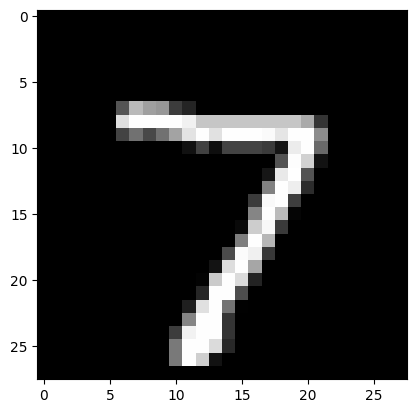

1/1 [==============================] - 0s 56ms/step
Predicted Class: 7


In [9]:
#In class programming 2 Mnist
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0 # COMMENT THESE OUT TO RUN WITHOUT SCALING IMAGES
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='tanh', input_shape=(dimData,)))  # Using tanh activation
#model.add(Dense(512, activation='tanh'))  # Using tanh activation
#model.add(Dense(512, activation='relu')) #Additional hidden layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# Select an image from the test set
model_index = 0

# Display the image
plt.imshow(test_images[model_index], cmap='gray')
plt.show()

# Perform inference
predicted_class = np.argmax(model.predict(test_data[model_index].reshape(1, dimData)))
print(f'Predicted Class: {predicted_class}')